In [7]:
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap


from mysql.connector import Error


def do_europemap():

    try:
        connection = mysql.connector.connect(host='localhost',
                                            database='GNSShare',
                                            user='apl_user',
                                            password='20Apl22!')
        if connection.is_connected():
            cursor = connection.cursor()
            myQuery = "select * from StazioneGNSS;"
            dfStazioni = pd.read_sql(myQuery, connection) #creo un dataframe da utilizzare dopo
            cursor.execute(myQuery)
            records = cursor.fetchall()

            #for row in records:
            #    print(row[0] + "\t| " + row[1] + "\t| " + str(row[2]) + "\t| " + str(row[3]) + "\t| " + str(row[4]) + "\t| " + row[5] + "\t| " + row[6] + "\t| " + str(row[7]) + "\t| " + str(row[8]) + "\t| " + str(row[9]) + "\n")

    except Error as e:
        print("Errore in fase di connessione col database MySQL", e)
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            #print("Connessione a MySQL chiusa")

    plt.figure(1, figsize=(8, 8))
    plt.figure(1)
    plt.title("Mappa generale")
    m = Basemap(projection='lcc', resolution='i',
                width=4E6, height=3E6, 
                lat_0=42.5, lon_0=14.096,)
    #m.etopo(scale=0.5, alpha=0.5)
    m.shadedrelief()

    # Map (long, lat) to (x, y) for plotting
    for ix, stat in dfStazioni.iterrows():
        x, y = m(stat.longitudine,stat.latitudine)
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x,y, stat.codice, fontsize=12)
    print("Mappa aggiornata!")



import io

def get_plot():
    bytes_image = io.BytesIO()
    plt.figure(1)
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    print(str(bytes_image.__sizeof__()) + " Bytes")
    return bytes_image

def get_plot_by_code(codiceStazione, latitudine, longitudine):
    plt.figure(2, figsize=(3, 3))
    plt.figure(2)
    plt.title("Posizione " + codiceStazione)

    m = Basemap(projection='cass', resolution=None,
        width=5E5, height=5E5, 
        lat_0=latitudine, lon_0=longitudine,)
    
    m.shadedrelief()
    x, y = m(longitudine,latitudine)
    plt.figure(2)
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x,y, codiceStazione, fontsize=12)

    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    print(str(bytes_image.__sizeof__()) + " Bytes")
    plt.clf()
    return bytes_image

def get_plot_downloads():

    try:
        connection = mysql.connector.connect(host='localhost',
                                            database='GNSShare',
                                            user='apl_user',
                                            password='20Apl22!')
        if connection.is_connected():
            cursor = connection.cursor()
            myQuery = "select codiceStazione, sum(downloads) as totDownloads from MetadatiFile group by codiceStazione;"
            dfFiles = pd.read_sql(myQuery, connection) #creo un dataframe da utilizzare dopo
            cursor.execute(myQuery)
            records = cursor.fetchall()

    except Error as e:
        print("Errore in fase di connessione col database MySQL", e)
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()


    stazione = dfFiles['codiceStazione']
    totDownloads = dfFiles['totDownloads']
    plt.figure(3, figsize = (10,3))
    plt.figure(3)
    #ax3 = fig3.add_axes([0,0,1,1])
    plt.bar(stazione, totDownloads, width = 0.4)
    #plt.xlabel("stazioni")
    plt.ylabel("tot downloads")
    plt.title("Andamento downloads per stazione")
    #plt.show()

    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    print(str(bytes_image.__sizeof__()) + " Bytes")
    plt.clf()
    return bytes_image

def get_plot_total_movements():
    try:
        connection = mysql.connector.connect(host='localhost',
                                            database='GNSShare',
                                            user='apl_user',
                                            password='20Apl22!')
        if connection.is_connected():
            cursor = connection.cursor()
            myQuery = "select DATE(dataMovimento) as data, username, 1 totale, tipoMovimento from MovimentiFile;"
            dfMovimentiFile = pd.read_sql(myQuery, connection) 
            cursor.execute(myQuery)
            records = cursor.fetchall()

    except Error as e:
        print("Errore in fase di connessione col database MySQL", e)
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()

    from matplotlib.ticker import MaxNLocator
    plt.figure(4, figsize = (10,3))
    plt.figure(4)
    df_pivot = pd.pivot_table(
        dfMovimentiFile,
        values="totale",
        index="data",
        columns="tipoMovimento",
        aggfunc=np.sum
    )

    ax = df_pivot.plot(kind="bar", color=["green","orange"])
    fig = ax.get_figure()
    fig.set_size_inches(7, 6)
    ax.set_xlabel("")
    ax.set_ylabel("Totale download/upload")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) #mostra valori interi nell'ordinata
    plt.xticks(rotation=35, ha='right')
    plt.title("Movimentazione file")

    #plt.show()

    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    print(str(bytes_image.__sizeof__()) + " Bytes")
    plt.clf()
    return bytes_image
    


Mappa aggiornata!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Apr/2022 11:45:47] "GET /plots/plotstat?tipoStatistica=downloadPerStazione& HTTP/1.1" 200 -


13365 Bytes


127.0.0.1 - - [29/Apr/2022 11:45:48] "GET /plots/plotstat?tipoStatistica=movimentiPerData& HTTP/1.1" 200 -


16785 Bytes


127.0.0.1 - - [29/Apr/2022 11:45:51] "GET /plots/europemap?l=ul& HTTP/1.1" 200 -


304795 Bytes


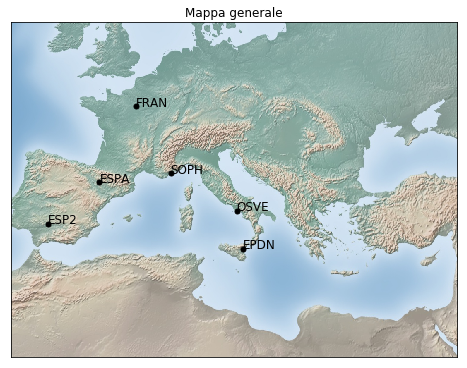

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 504x432 with 0 Axes>

In [8]:
from flask import Flask, send_file, make_response, request
#from plot import do_plot
app = Flask(__name__)

@app.route('/plots/europemap', methods=['GET'])
def europe_map():
    bytes_obj = get_plot()
    return send_file(bytes_obj,
                     attachment_filename='europemap.png',
                     mimetype='image/png')

@app.route('/plots/stationmap', methods=['GET'])
def station_map():
    codSt = request.args.get('codiceStazione')
    latSt = request.args.get('latitudine')
    lngSt = request.args.get('longitudine')
    bytes_obj = get_plot_by_code(codSt, latSt, lngSt)
    return send_file(bytes_obj,
                     attachment_filename='stationmap.png',
                     mimetype='image/png')

@app.route('/plots/plotstat', methods=['GET'])
def statistica_plot():
    tipoSt = request.args.get('tipoStatistica')
    if (tipoSt == 'downloadPerStazione'):
        bytes_obj = get_plot_downloads()
    elif (tipoSt == 'movimentiPerData'):
        bytes_obj = get_plot_total_movements()
    return send_file(bytes_obj,
                     attachment_filename='plotstat.png',
                     mimetype='image/png')

@app.route('/plots/refresheuropemap', methods=['GET'])
def do_europe_map():
    do_europemap()
    return "STATUS_OK"

if __name__ == '__main__':
    do_europemap()
    app.run(host="127.0.0.1", debug=False)